In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

In [129]:
data = pd.read_csv("mushrum_dataset.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Green,No Bruises,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [130]:
data.shape

(8124, 23)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [132]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,9,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,No Bruises,None,Free,Close,Broad,Buff,...,Smooth,White,White,Partial,White,One,Pendant,White,Several,Wood
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [133]:
data.duplicated().sum()

0

In [134]:
for i in data.columns:
    print(data[i].value_counts())

Edible       4208
Poisonous    3916
Name: class, dtype: int64
Convex     3656
Flat       3152
Knobbed     828
Bell        452
Sunken       32
c             4
Name: cap-shape, dtype: int64
Scaly      3244
Smooth     2556
Fibrous    2320
Grooves       4
Name: cap-surface, dtype: int64
Brown       2284
Green       1856
Red         1500
Yellow      1072
White       1040
Buff         168
Pink         144
Cinnamon      44
Purple        16
Name: cap-color, dtype: int64
No Bruises    4748
Bruises       3376
Name: bruises, dtype: int64
None        3528
Foul        2160
Spicy        576
Fishy        576
Anise        400
Almond       400
Pungent      256
Creosote     192
Musty         36
Name: odor, dtype: int64
Free        7914
Attached     210
Name: gill-attachment, dtype: int64
Close      6812
Crowded    1312
Name: gill-spacing, dtype: int64
Broad     5612
Narrow    2512
Name: gill-size, dtype: int64
Buff         1728
Pink         1492
White        1202
Brown        1048
Gray          752
Choc

In [135]:
for i in data.columns:
    print(pd.crosstab(data[i], data["class"]))
    print("-----------------------------------")


class      Edible  Poisonous
class                       
Edible       4208          0
Poisonous       0       3916
-----------------------------------
class      Edible  Poisonous
cap-shape                   
Bell          404         48
Convex       1948       1708
Flat         1596       1556
Knobbed       228        600
Sunken         32          0
c               0          4
-----------------------------------
class        Edible  Poisonous
cap-surface                   
Fibrous        1560        760
Grooves           0          4
Scaly          1504       1740
Smooth         1144       1412
-----------------------------------
class      Edible  Poisonous
cap-color                   
Brown        1264       1020
Buff           48        120
Cinnamon       32         12
Green        1048        808
Pink           56         88
Purple         16          0
Red           624        876
White         720        320
Yellow        400        672
-----------------------------------
cla

In [136]:
le = LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,1,3,8,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,7,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,1,2,7,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,1,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


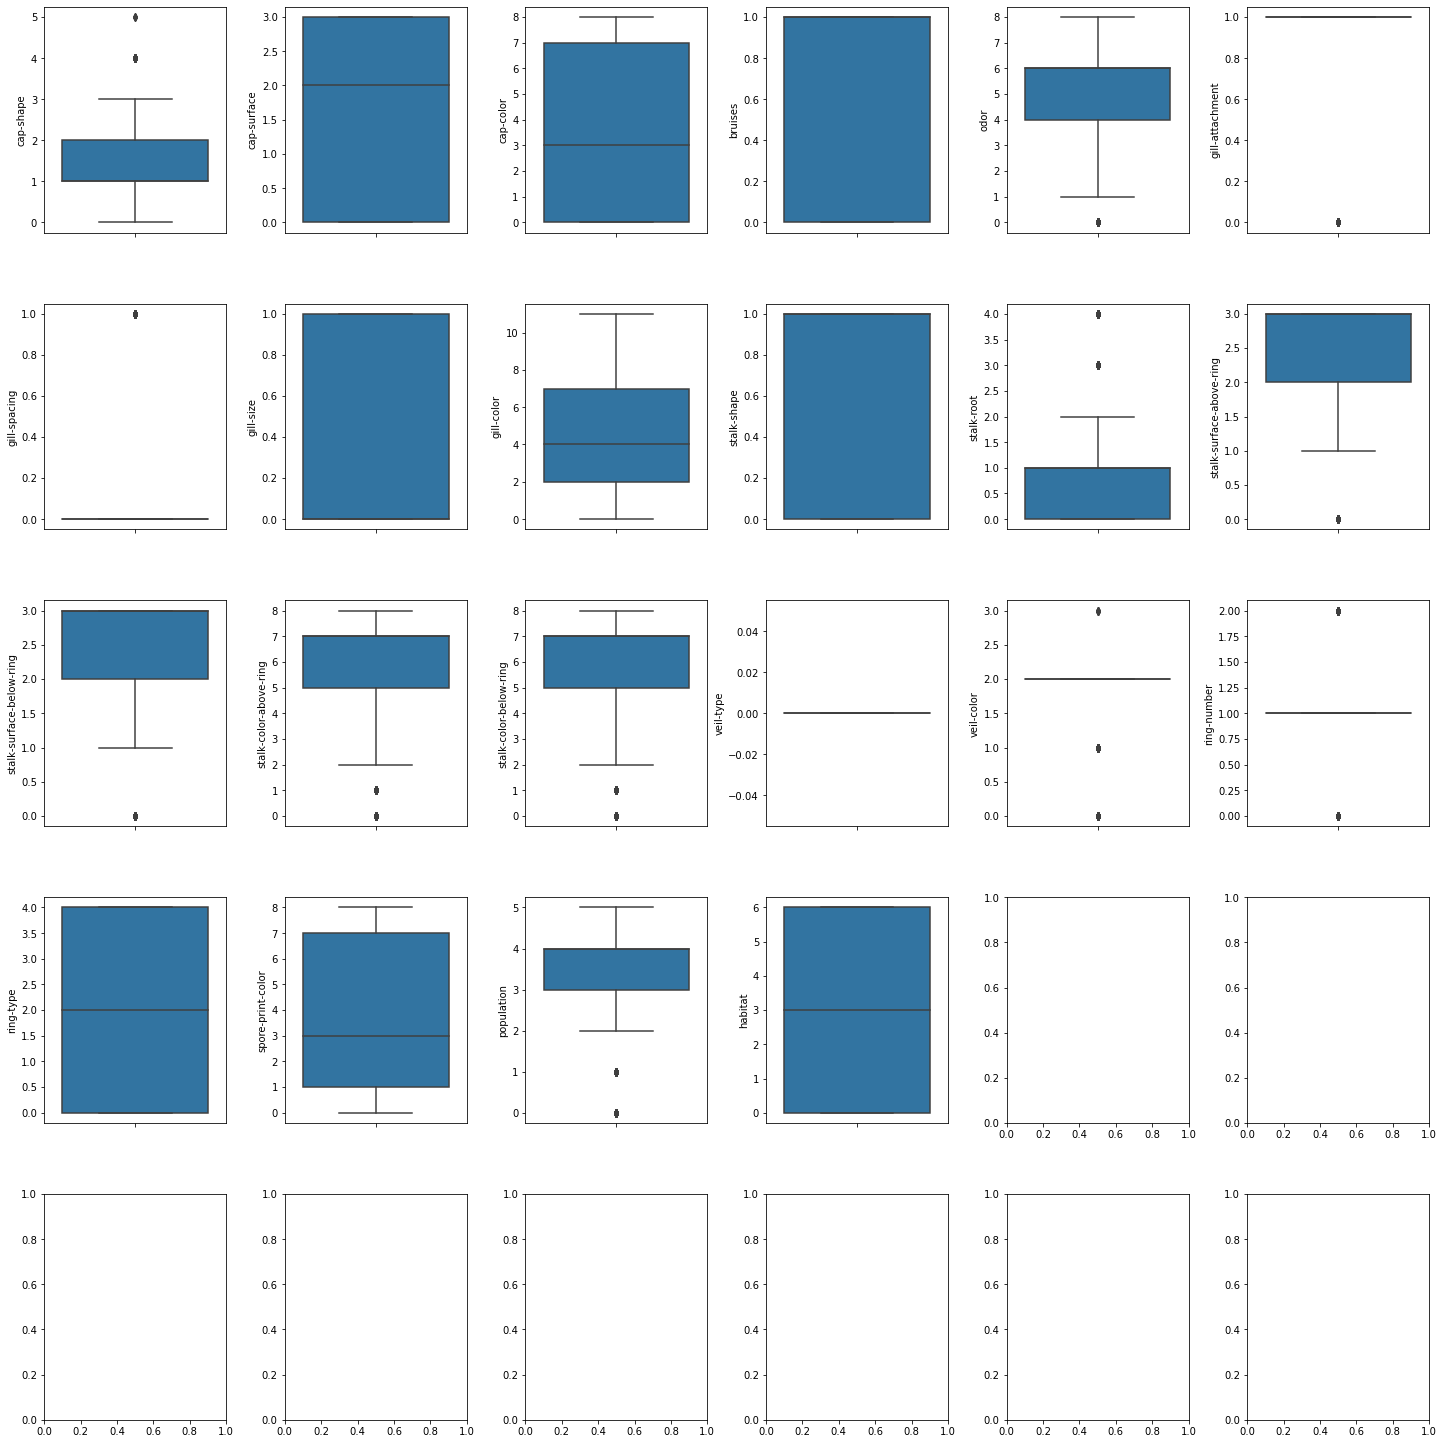

In [137]:
data1 = data.drop(columns=['class'], axis=1)

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [138]:
data.dropna(inplace=True)

In [148]:
x = data.drop(columns = "class")
y = data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [140]:
lor = LogisticRegression()

In [141]:
dt = DecisionTreeClassifier()

In [142]:
rf = RandomForestClassifier(n_estimators=100)

In [143]:
estimators = [("lor",lor), ("dt",dt), ("rf",rf)]
vc = VotingClassifier(estimators = estimators, voting="hard")

In [144]:
models = [("lor",lor), ("dt",dt), ("vc",vc), ("rf",rf)]

for i in models:
    var = i[1]
    var.fit(x_train,y_train)
    pred = var.predict(x_test)
    print("accuracy_score ",i[0],": ",accuracy_score(y_test,pred)*100)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy_score  lor :  94.39999999999999
accuracy_score  dt :  100.0
accuracy_score  vc :  100.0
accuracy_score  rf :  100.0


In [149]:
x = cross_val_score(LogisticRegression(),x_train,y_train,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2)*100)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

95.0


C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
